In [1]:
import csv

import numpy as np
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2024-11-24 00:21:02.822419: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-24 00:21:02.831566: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732436462.842802  473711 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732436462.846240  473711 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 00:21:02.858272: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

# each row is a flattened series of 21 points, each point has 2 coordinates. We need to reshape it to 21x2
X_dataset = X_dataset.reshape(-1, 21, 2)

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = keras.models.Sequential(
    [
        keras.layers.Input((21, 2)),
        keras.layers.GaussianNoise(0.1),
        keras.layers.Conv1D(6, 4, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling1D(3),
        keras.layers.GaussianNoise(0.1),
        keras.layers.Conv1D(18, 4, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling1D(3),
        keras.layers.Flatten(),
        keras.layers.GaussianNoise(0.2),
        keras.layers.Dense(20, activation="relu"),
        keras.layers.GaussianNoise(0.2),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(NUM_CLASSES, activation="softmax"),
    ]
)
model.summary()

2024-11-24 00:21:04.895904: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 21, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 18, 6)          │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 18, 6)          │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 6)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ (None, 6, 6)           │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 3, 18)          │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3, 18)          │            72 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 18)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_2                │ (None, 18)             │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_3                │ (None, 20)             │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,208 (4.72 KB)

 Non-trainable params: 48 (192.00 B)

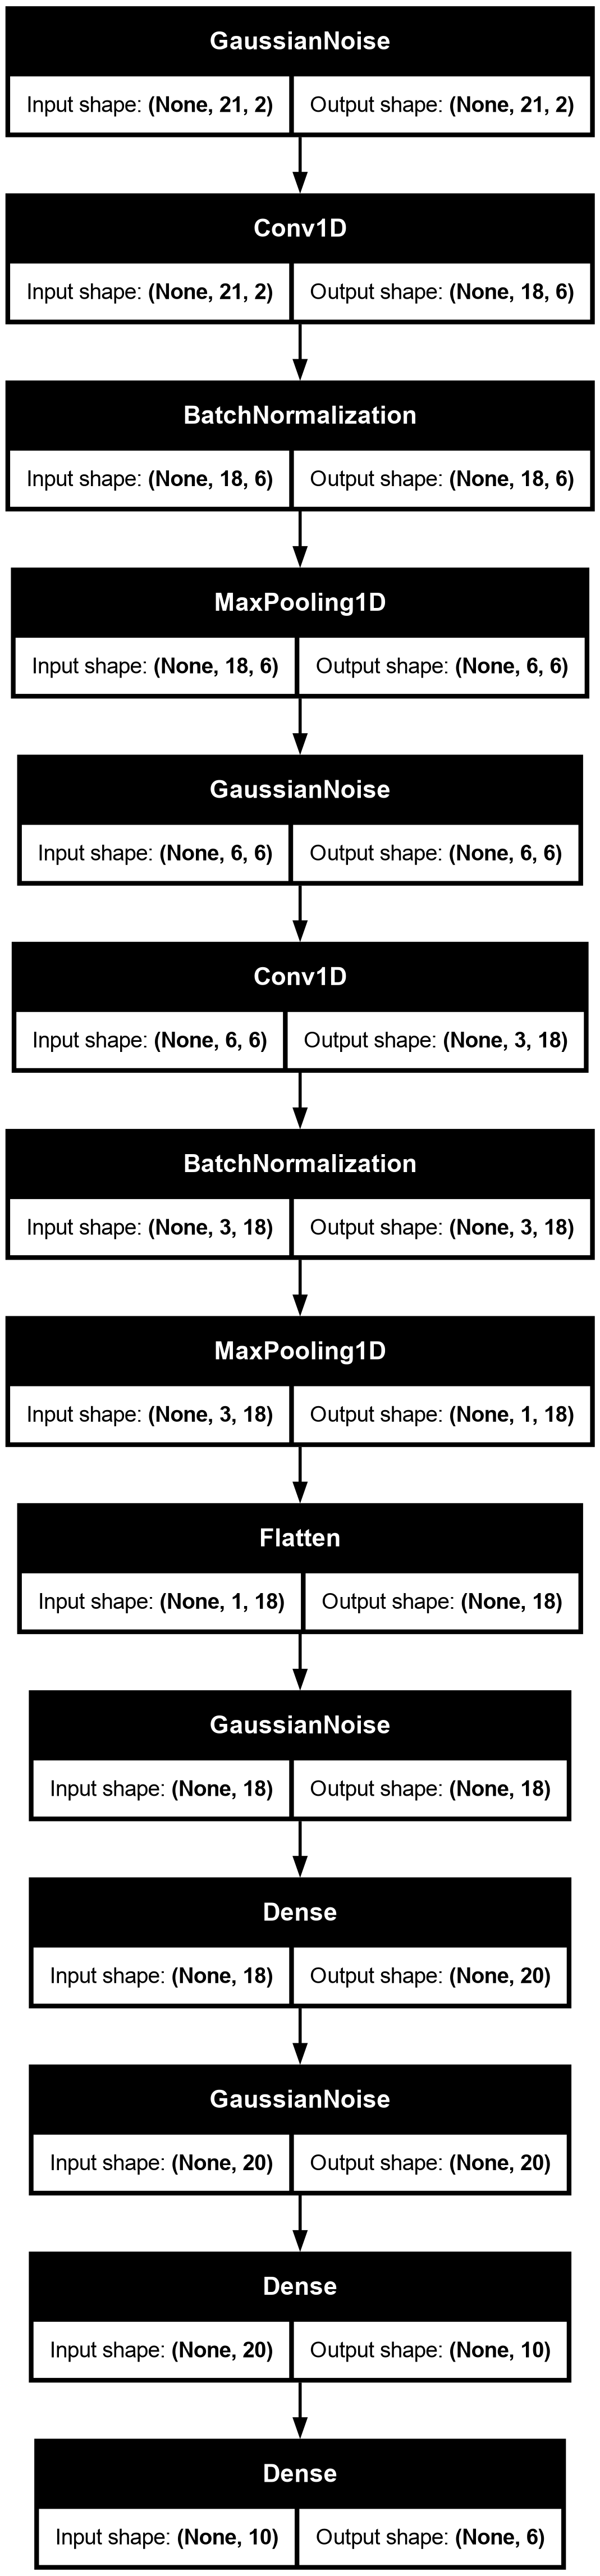

In [8]:
keras.utils.plot_model(model, show_shapes=True)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2010 - loss: 1.9020
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2012 - loss: 1.8996 - val_accuracy: 0.1415 - val_loss: 1.7882
Epoch 2/1000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2188 - loss: 1.7691
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2362 - loss: 1.7230 - val_accuracy: 0.2102 - val_loss: 1.7884
Epoch 3/1000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2422 - loss: 1.6602
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2464 - loss: 1.6817 - val_accuracy: 0.2014 - val_loss: 1.7862
Epoch 4/1000
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2891 - loss: 1.6582
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9749 - loss: 0.0940  


In [13]:
# Loading the saved model
from typing import Any


model: Any = keras.models.load_model(model_save_path)
assert model is not None

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[3.4082751e-03 2.1508292e-03 2.3868596e-03 6.2924963e-03 3.8205905e-04
 9.8537952e-01]
5


# Confusion matrix

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step


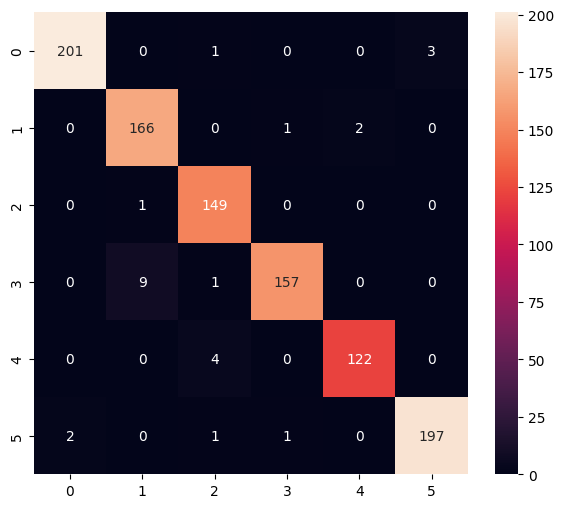

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       205
           1       0.94      0.98      0.96       169
           2       0.96      0.99      0.97       150
           3       0.99      0.94      0.96       167
           4       0.98      0.97      0.98       126
           5       0.98      0.98      0.98       201

    accuracy                           0.97      1018
   macro avg       0.97      0.97      0.97      1018
weighted avg       0.97      0.97      0.97      1018



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpx11jzeey/assets


INFO:tensorflow:Assets written to: /tmp/tmpx11jzeey/assets


Saved artifact at '/tmp/tmpx11jzeey'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 2), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  135188861960016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189331411216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189331414864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189331412752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189331413328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189331411792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189331412176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189331412368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189236684304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189236683152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135189331414288: Tens

W0000 00:00:1732436490.622950  473711 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1732436490.622967  473711 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-11-24 00:21:30.623176: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpx11jzeey
2024-11-24 00:21:30.623970: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-11-24 00:21:30.623978: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpx11jzeey
I0000 00:00:1732436490.629889  473711 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-11-24 00:21:30.630943: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-11-24 00:21:30.667521: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpx11jzeey
2024-11-24 00:21:30.677204: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

11772

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 115 μs, sys: 25 μs, total: 140 μs
Wall time: 89.4 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.4082751e-03 2.1508301e-03 2.3868594e-03 6.2924963e-03 3.8205888e-04
 9.8537952e-01]
5
